# Introduction to PCA

In [ ]:
import pandas as pd
pd.set_option("display.precision", 3)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import numpy as np

from sklearn import set_config
set_config(display="text") # estimators are displayed as text instead of diagrams.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import io # input output library

<img src="IMG_9121.jpg" alt="drawing" width="400"/>
<img src="IMG_9122.jpg" alt="drawing" width="400"/>


# Introduction to Dataset

Using `crabs.csv`

In [6]:
df = pd.read_csv("crabs.csv",)
df.head()

new_cols = {
    "sp": "species", "FL": "frontal lobe", 
    "RW": "rear width", "CL": "carapace midline",
    "CW": "maximum width", "BD": "body depth"
}

# Some column manipulations
df.rename(columns=new_cols, inplace=True)
df.head()

# Can also manipulate to remape categorical outcomes
df["species"] = df["species"].map({"B": "Blue", "O": "Orange"})
df["sex"] = df["sex"].map({"M": "male", "F": "female"})

# Some descriptions
df.describe(include="all")

df.shape

(200, 8)

## Goal is to separate all data points (rows) in sheet into classes 

Classes are by sex and by species.
So you are Male and Blue, Male and Orange, Female and Blue, Female and Orange, that is there are 4 outcomes. 

In [7]:
# first define the outcome column as the concatenated designation that each row posses, since
# each row will have either male or female and separately either blue or orange.

df["class"] = df.species + df.sex
df["class"].value_counts()

# visualze 

class
Bluemale        50
Bluefemale      50
Orangemale      50
Orangefemale    50
Name: count, dtype: int64

# Initial Visualization

In [70]:
# Choose columns of interest only.
data_columns = ["frontal lobe", "rear width", "carapace midline", "maximum width", "body depth"]
df[data_columns].describe()

,frontal lobe,rear width,carapace midline,maximum width,body depth
count,200.000,200.000,200.000,200.000,200.000
mean,15.583,12.738,32.105,36.415,14.030
std,3.495,2.573,7.119,7.872,3.425
min,7.200,6.500,14.700,17.100,6.100
25%,12.900,11.000,27.275,31.500,11.400
50%,15.550,12.800,32.100,36.800,13.900
75%,18.050,14.300,37.225,42.000,16.600
max,23.100,20.200,47.600,54.600,21.600


## Boxplot

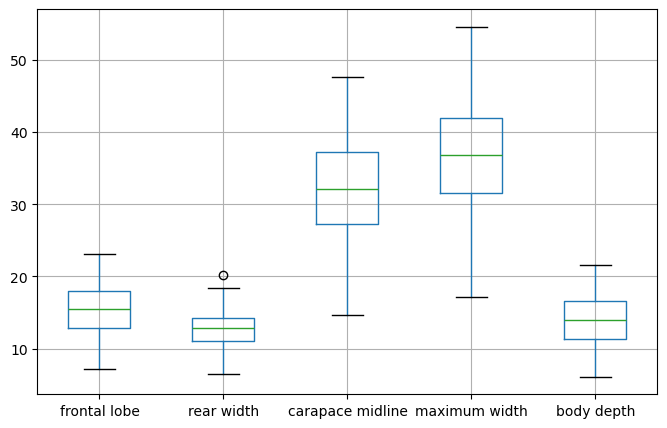

In [71]:
fig, ax = plt.subplots(figsize=(8, 5));
df[data_columns].boxplot();

!<img src="boxplot.png" alt="boxplot" width="500"/>


## Boxplot with futher breakdown using 'by'

The above is the aggregated summary while this gives a futher breakdown.


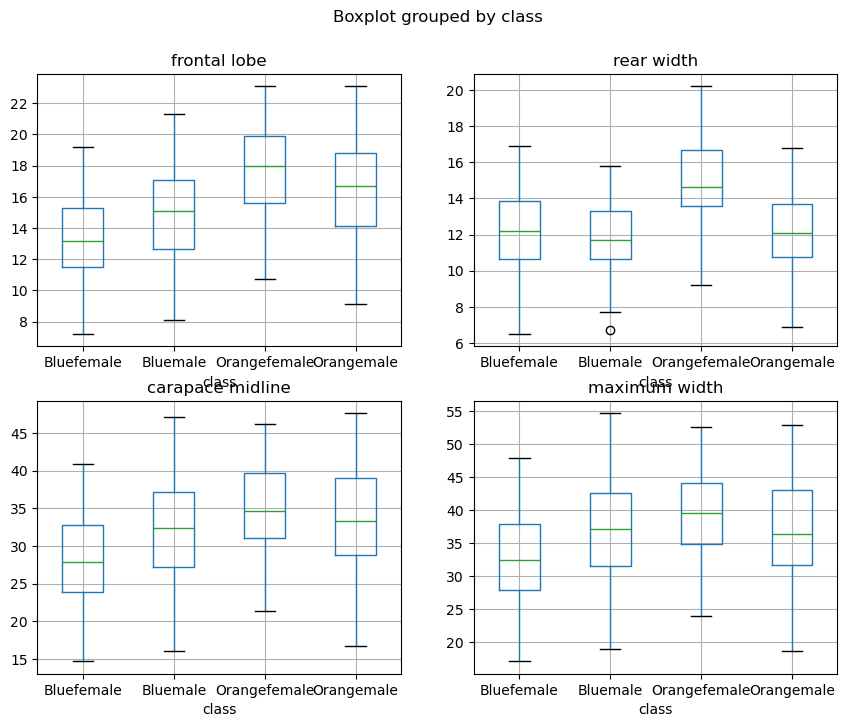

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # 2 rows, 2 columns
df.boxplot(ax=axs[0,0], column=data_columns[0], by="class", figsize=(5,3))
df.boxplot(ax=axs[0,1], column=data_columns[1], by="class", figsize=(5,3));
df.boxplot(ax=axs[1,0], column=data_columns[2], by="class", figsize=(5,3),);
df.boxplot(ax=axs[1,1], column=data_columns[3], by="class", figsize=(5,3),);

plt.show()

## Histograms

Do histograms of your plots in a flat, subplot form so they're all in a line.

array([[<Axes: title={'center': 'frontal lobe'}>,
        <Axes: title={'center': 'rear width'}>,
        <Axes: title={'center': 'carapace midline'}>,
        <Axes: title={'center': 'maximum width'}>,
        <Axes: title={'center': 'body depth'}>, <Axes: >]], dtype=object)

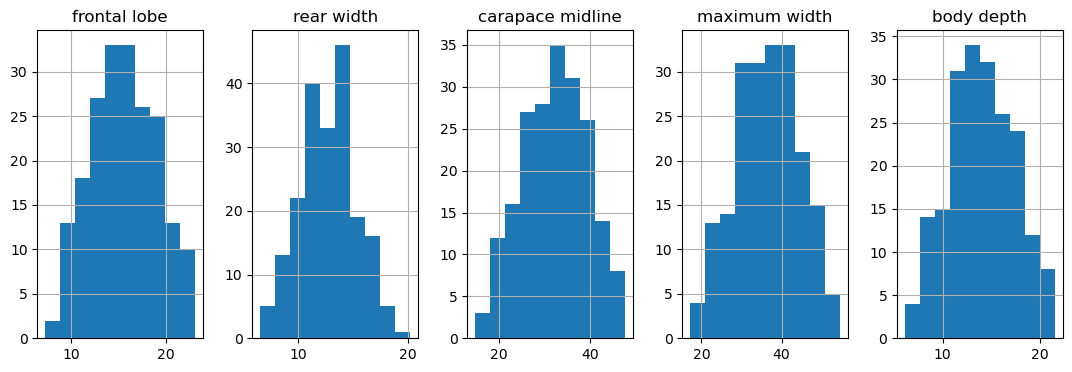

In [73]:
df[data_columns].hist(figsize=(16,4), layout=(1,6))

## Histogram with Seaborn

/Users/jaimemerizalde/miniconda3/envs/machineLearning/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jaimemerizalde/miniconda3/envs/machineLearning/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jaimemerizalde/miniconda3/envs/machineLearning/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jaimemerizalde/miniconda3/envs/machineLearning/lib/python3.12/site-packages

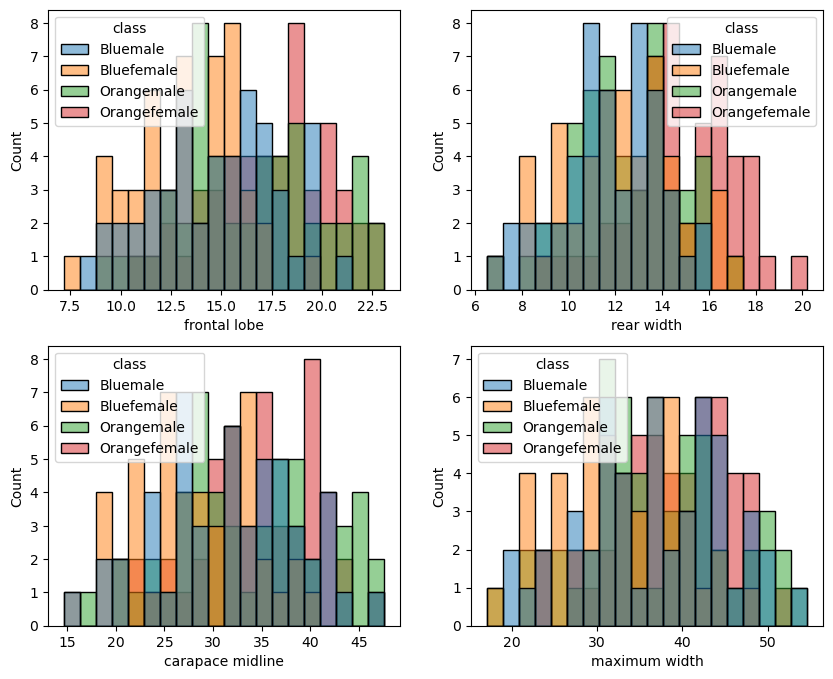

In [ ]:
# plt.figure(figsize=(8,6)); # this option is for one figsize
fig, axs = plt.subplots(2, 2, figsize=(10, 8));  # 2 rows, 2 columns

sns.histplot(df, x=data_columns[0], hue="class", bins=20, ax=axs[0,0],);
sns.histplot(df, x=data_columns[1], hue="class", bins=20, ax=axs[0,1],);
sns.histplot(df, x=data_columns[2], hue="class", bins=20, ax=axs[1,0],);
sns.histplot(df, x=data_columns[3], hue="class", bins=20, ax=axs[1,1],);


## Pairplotting

Allows visual of pairwise relationship between variables.

/Users/jaimemerizalde/miniconda3/envs/machineLearning/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jaimemerizalde/miniconda3/envs/machineLearning/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jaimemerizalde/miniconda3/envs/machineLearning/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jaimemerizalde/miniconda3/envs/machineLearning/lib/python3.12/site-packages

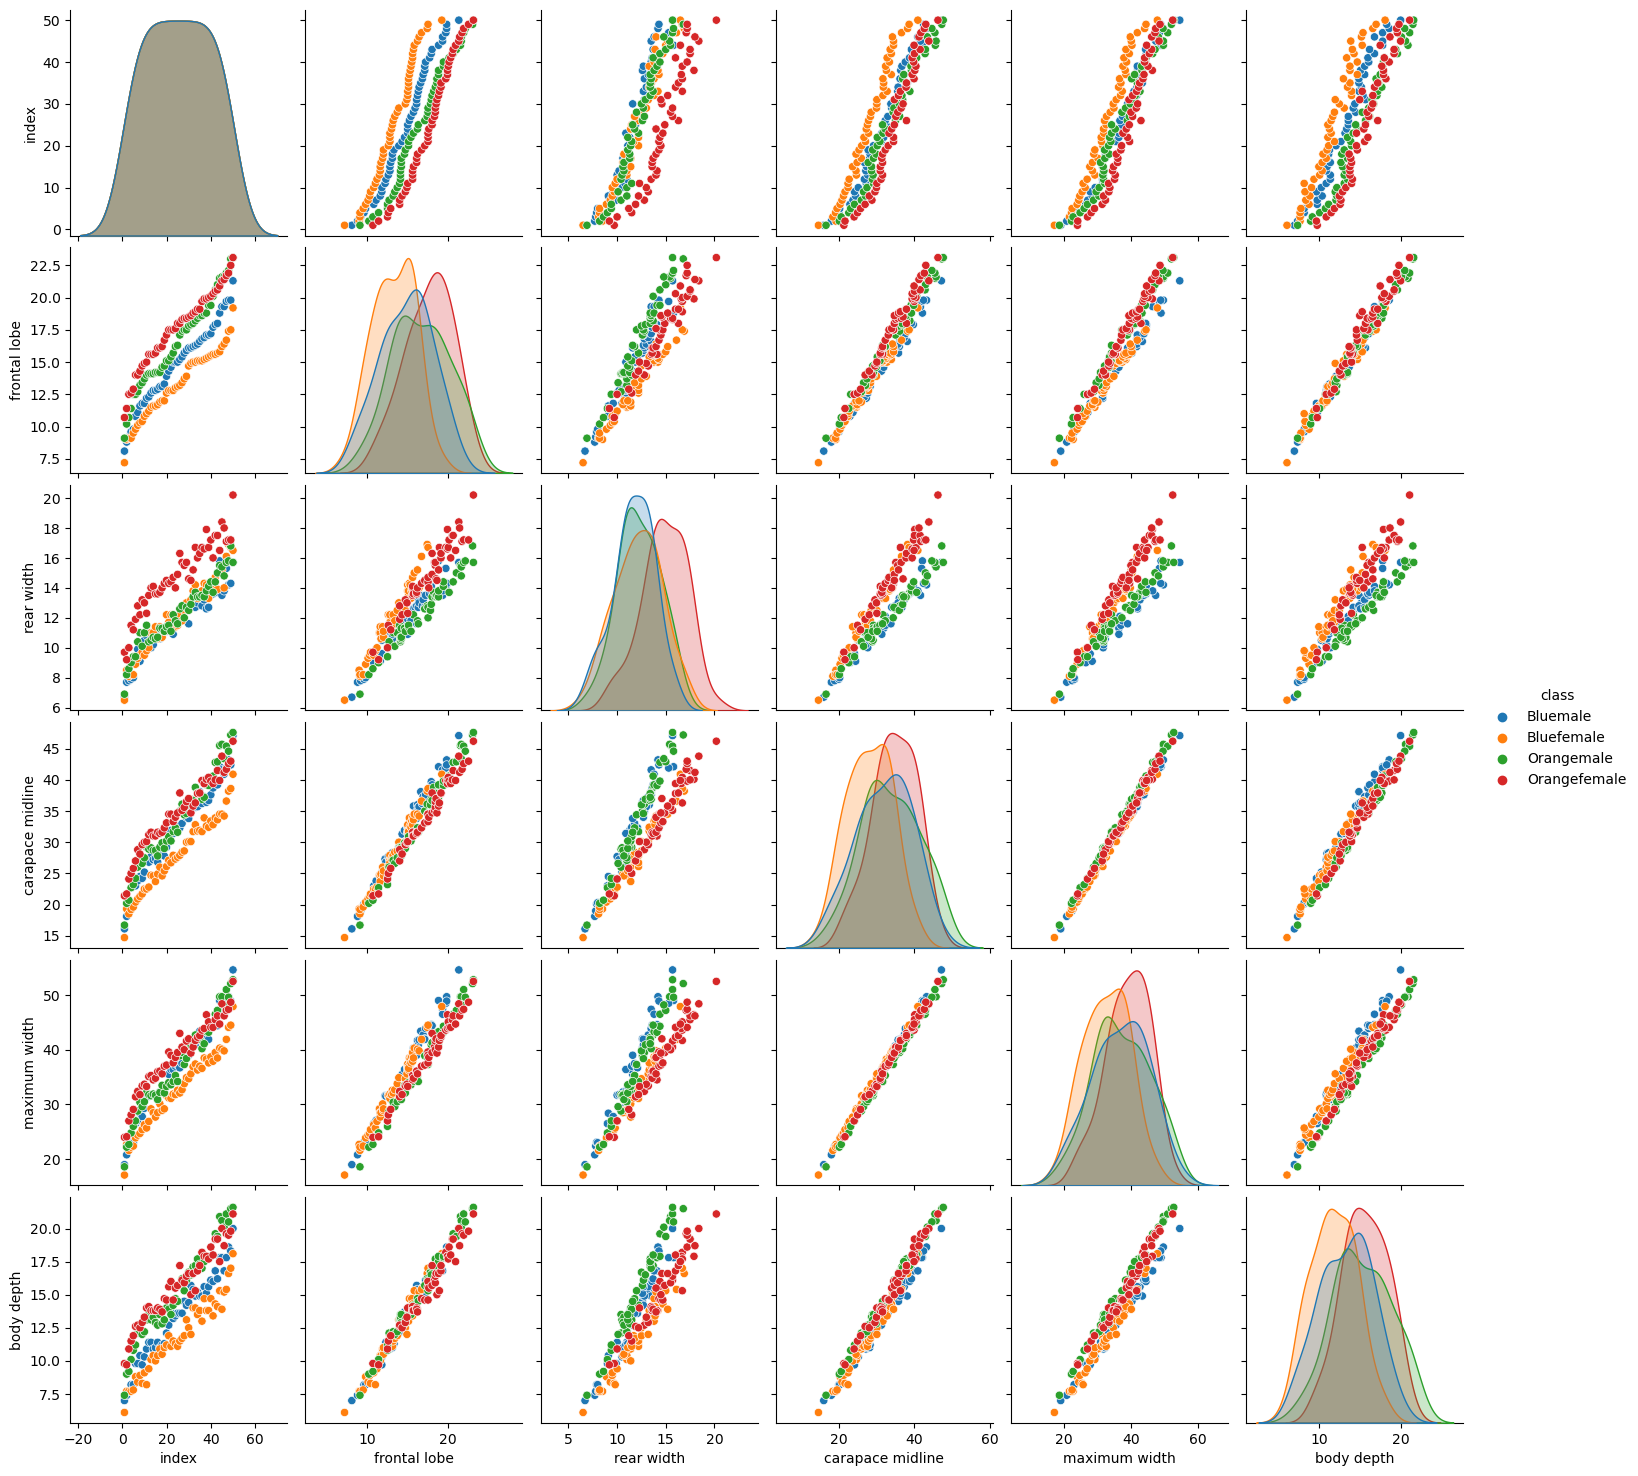

In [86]:
sns.pairplot(df, hue="class")

# Using PCA

Reduce dimension of data for easier compu$ and data viz.

## Standardize data

In [45]:
# Any manipulations done before should be reapplied again.
# They only include columns changes etc, nothing like standardization we will do here.
# First, import the sklearn library with packages that will do this for us already. 
# I have been doing these manually before.

from sklearn import set_config
set_config(display="text") # estimators are displayed as text instead of diagrams.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df_std = df.copy(deep=True)
data_columns = ["frontal lobe", "rear width", "carapace midline", "maximum width", "body depth"] # Transform only relevant features.
df_std[data_columns] = StandardScaler().fit_transform(df[data_columns]) # Standardize now mean is 0 and sdev is 1. b 
df_std.describe().T  # Notice the max and other values look similar.

,count,mean,std,min,25%,50%,75%,max
index,200.0,2.550e+01,14.467,1.000,13.000,2.550e+01,38.000,50.000
frontal lobe,200.0,-7.105e-17,1.003,-2.404,-0.770,-9.465e-03,0.708,2.156
rear width,200.0,6.040e-16,1.003,-2.430,-0.677,2.396e-02,0.608,2.907
carapace midline,200.0,1.066e-16,1.003,-2.451,-0.680,-7.745e-04,0.721,2.182
maximum width,200.0,-4.974e-16,1.003,-2.460,-0.626,4.909e-02,0.711,2.316
body depth,200.0,0.000e+00,1.003,-2.321,-0.770,-3.820e-02,0.752,2.216


## Apply PCA

In [46]:
from sklearn.decomposition import PCA

df_pca = PCA().fit(df_std[data_columns]) 



## Choosing How Many and What Components to Include

In [ ]:
print(data_columns)
print(df_pca.explained_variance_ratio_) # REturns vector of variance explained by each dimension.
print(df_pca.explained_variance_ratio_.cumsum()) # vector x such that x[i] returns cumulative variance explained by first i+1 dimensions

[9.57766957e-01 3.03370413e-02 9.32659482e-03 2.22707143e-03
 3.42335531e-04]

 9.57766957e-01 - explained variance by frontal lobe
 3.03370413e-02 - rear width... etc.


[0.95776696 0.988104   0.99743059 0.99965766 1. ]
from here how many components are explaining the variance so 
first is 0.95776696
first TWO are 0.988104 


## Screeplot

Another way is through a scree plot

Text(0, 0.5, 'Eigenvalues')

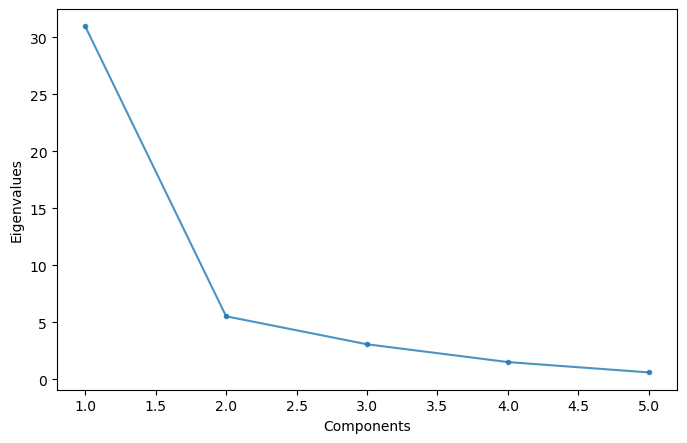

In [23]:
fig = plt.figure(figsize=(8, 8/1.618))
 
# How many components
plt.plot(
    range(1, len(df_pca.singular_values_) + 1),
    df_pca.singular_values_,
    alpha=0.8,
    marker="."
)

plt.xlabel("Components")
plt.ylabel("Eigenvalues")

This matters because we can see how large the singular values in descending order. you can see the first component is the LARGEST by 6X the second component.

We want to retain number of components, usually want to components before the "cliff".

## Plotting Explained Variance by Component

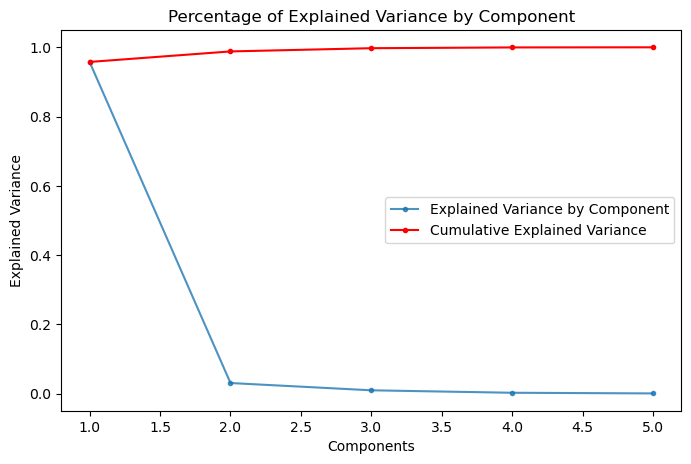

In [47]:
import numpy as np

fig = plt.figure(figsize=(8 , 8/1.618))

plt.plot(
    range(1, len(df_pca.explained_variance_ratio_) + 1),
    df_pca.explained_variance_ratio_,
    alpha=0.8,
    marker=".",
    label="Explained Variance by Component"
)

plt.plot(
    range(1, len(df_pca.explained_variance_ratio_) + 1),
    np.cumsum(df_pca.explained_variance_ratio_),
    c="r",
    marker=".",
    label="Cumulative Explained Variance"
)

plt.xlabel("Components")
plt.ylabel("Explained Variance")
plt.legend()
plt.title("Percentage of Explained Variance by Component");

In blue, you can see there is most of the variance explained by component 1.

In red, you can see the cumulative variance explained by additional components in order of descending magnitude of eigenvalue.

## Visualizing Weights PCA per Component

<Axes: >

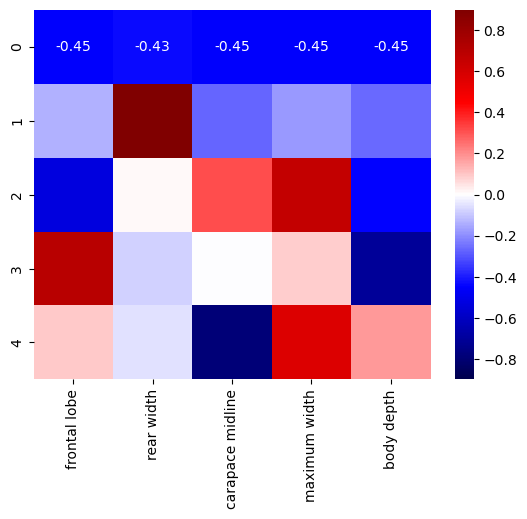

In [48]:
sns.heatmap(
    df_pca.components_, cmap="seismic", 
    xticklabels=list(df.columns[3:-1]), # This means we are getting all values up to 3.
    # force color map to range like values in the data set, since the values in 
    # pca components can be negative.
    vmin=-np.max(np.abs(df_pca.components_)), 
    vmax=np.max(np.abs(df_pca.components_)), 
    annot=True, # visualize weights inside each cell. 
)

# NOTE: in this case, I am not seeing all of the weights be rendered for each component.

Component 1 plays an important role in the explanation of the rear width, but looks like not much else.  
Component 2 plays an important rol in frontal lobe, carapace midline, maximum width, and sort of body depth.  
Component 3... frontal lobe and body depth.  
Component 4, Carapace midline and maximum width.

## Visualize Data with Key PCA Components

Lets use 2 and then 3 components. 

<Axes: xlabel='PC1', ylabel='PC2'>

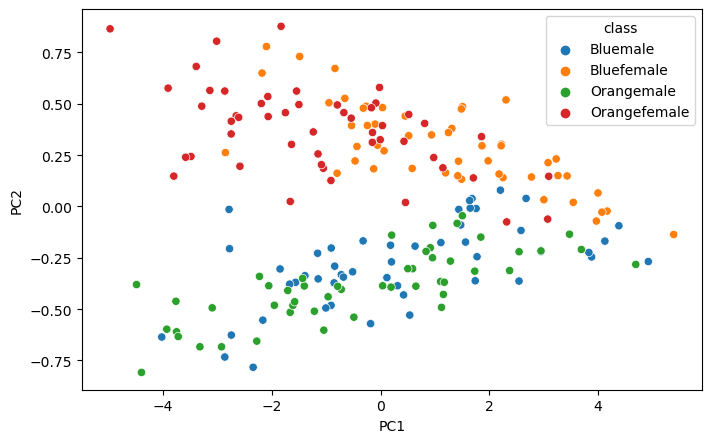

In [ ]:
# The difference here is before we used 'fit' now we use 'transform'.
# Fit is to find the eigenvalues appropriate for this data, they are the parameters / the model.
# Transform is the fit applied to the actual data.

# The transformed data is what we will catagorize.
# Note: this contains ALL the data transformed. 
# Later we will have only the first three of these columns.
# The are arranged by order of decreasing EigenValue magnitude.
df_transformed = df_pca.transform(df_std[data_columns]);

# Add the new columns 
df_std[["PC1", "PC2", "PC3"]] = df_transformed[:,:3]

fig = plt.figure(figsize=(8, 8/1.618));
sns.scatterplot(x="PC1", y="PC2", hue="class", data=df_std)
sns.scatterplot(x="PC1", y="PC2", hue="class", data=df_std)

Now 3 components.

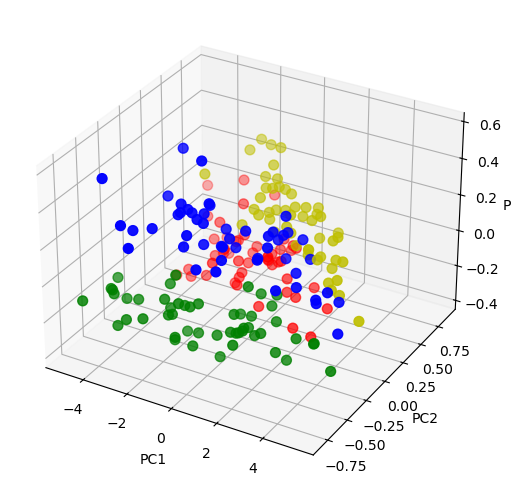

In [92]:
from mpl_toolkits.mplot3d import Axes3D;

df_std["class"].unique() # 'Bluemale', 'Bluefemale', 'Orangemale', 'Orangefemale']
colors_crabs = {
    "Bluefemale": "y",
    "Bluemale": "b",
    "Orangefemale": "r",
    "Orangemale": "g"
}

fig = plt.figure(figsize=(10, 10/1.618));
ax = fig.add_subplot(111,projection="3d"); # This is how we are going to do a 3D plot.

plt.scatter(
    df_std.PC1, df_std.PC2, 
    zs=df_std.PC3,
    # depthshade=False, 
    # This is a color mapper that will map each class row to the color scheme created above.
    c=df["class"].apply(lambda x: colors_crabs[x]),
    s=50 # size of markers.
);

plt.xlabel("PC1")
plt.ylabel("PC2")
ax.set_zlabel("PC3"); # label doesn't show too well.